In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import io
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.animation import FuncAnimation
import glob
import random

from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
import scipy.integrate as integrate
import lightkurve

from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

import math
import datetime as dt
import lightkurve.io as l
from lightkurve.io.generic import read_generic_lightcurve

In [2]:
s = scipy.io.readsav("C:/Users/kmanj/Manjavacas Research/Allers_2020/2M1047_epoch1_ap2.sav")
s

{'t': array([0.        , 0.00860596, 0.01721191, 0.02581787, 0.03448486,
        0.04309082, 0.05169678, 0.06030273, 0.06896973, 0.07757568,
        0.08642578, 0.09503174, 0.1036377 , 0.11224365, 0.12091064,
        0.1295166 , 0.13812256, 0.14672852, 0.15533447, 0.16418457,
        0.17254639, 0.18139648, 0.19000244, 0.19866943, 0.20727539,
        0.21588135, 0.2244873 , 0.23309326, 0.24169922, 0.25030518,
        0.25915527, 0.26782227, 0.27642822, 0.28503418, 0.3022461 ,
        0.31085205, 0.31951904, 0.328125  , 0.3369751 , 0.3453369 ,
        0.35424805, 0.362854  , 0.37145996, 0.38006592, 0.38867188,
        0.39727783, 0.4058838 , 0.4147339 , 0.4230957 , 0.43200684,
        0.4406128 , 0.44921875, 0.4578247 , 0.46643066, 0.47503662,
        0.48364258, 0.49224854, 0.5097656 , 0.5183716 , 0.52697754,
        0.5355835 , 0.54418945, 0.5527954 , 0.56140137, 0.57006836,
        0.5786743 , 0.5872803 , 0.59588623, 0.60479736, 0.6134033 ,
        0.6220093 , 0.63061523, 0.6392212 ,

In [3]:
len(s['corrected_flux'][0][0])

9

In [4]:
t = []
flux = []

for i in s['bint']:
    t.append(i[0])

for i in s['binflux']:
    flux.append(i[0])

    
flux

[0.99920505,
 0.9997417,
 0.9976727,
 1.0015901,
 1.0069242,
 1.0028899,
 1.0020171,
 1.0022334,
 1.0028875,
 1.013061,
 0.9990193,
 1.0076642,
 1.0097212,
 0.9987699,
 1.0040144,
 0.9982019,
 0.99742025,
 0.9994503,
 1.0,
 0.9867042,
 1.000466,
 0.995036,
 0.9900848,
 0.99162084,
 0.99588263,
 0.9988522,
 0.99768245,
 0.9935384,
 0.9915346,
 0.98830444,
 0.9944741,
 0.9925965,
 0.9969669,
 0.9945317,
 1.0013596,
 0.99909246,
 1.0011443,
 0.99850684,
 0.9978031,
 1.0034698,
 1.0084947,
 1.0034809,
 1.0046881,
 1.0046425,
 1.0081323,
 1.0121757,
 1.0063382,
 0.9987027,
 1.003499,
 1.0065771,
 1.0043297,
 1.0073118,
 1.0051787,
 1.0038807,
 1.002189,
 1.0031915,
 1.0023019,
 0.997861,
 0.99491745,
 0.99706674,
 0.99892986,
 0.9960902,
 0.9944024,
 0.99506587,
 0.9917741,
 0.9913045,
 0.99522334,
 1.0009092,
 0.9957131,
 0.99617004,
 1.0026686,
 0.9922956,
 0.998942,
 0.9910741,
 1.0027039,
 0.99591917,
 1.0066862,
 1.0045953,
 1.0022273,
 1.0101688,
 0.9998485,
 0.9984166,
 1.0139974,
 1

Text(0, 0.5, 'Relative Flux')

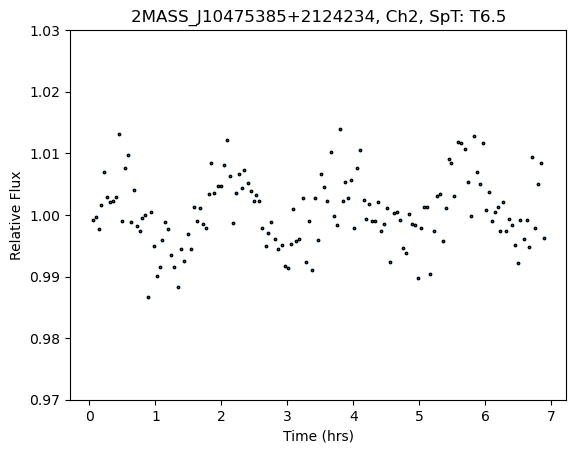

In [5]:
plt.scatter(t, flux, s =3, edgecolors = 'black')
plt.ylim(0.97, 1.03)
plt.title('2MASS_J10475385+2124234, Ch2, SpT: T6.5')
plt.xlabel('Time (hrs)')
plt.ylabel('Relative Flux')

In [8]:
tt = scipy.io.readsav("C:/Users/kmanj/Manjavacas Research/Allers_2020/2M1047_epoch2_ap3.sav")
#len(t['bint'])

In [9]:
tt

{'t': array([0.0000000e+00, 8.3618164e-03, 1.7211914e-02, ..., 1.3797241e+01,
        1.3806091e+01, 1.3814453e+01], dtype=float32),
 'jd': array([58223.1541906, 58223.1545468, 58223.154908 , ..., 58223.7290843,
        58223.7294454, 58223.7298019]),
 'flux': array([[0.98827827, 1.0001072 , 1.0088983 , ..., 0.9937935 , 0.9921533 ,
         1.0646716 ],
        [1.0003875 , 1.008187  , 1.0031052 , ..., 0.97551215, 1.0016123 ,
         0.99843466],
        [0.99231327, 1.0115985 , 1.0008359 , ..., 0.87387574, 1.008088  ,
         1.0030056 ],
        ...,
        [0.9982841 , 0.9843511 , 0.9992914 , ..., 1.0112786 , 0.9901193 ,
         0.9936426 ],
        [0.9893804 , 1.0826197 , 0.9961044 , ..., 1.0100851 , 1.0079308 ,
         1.0081404 ],
        [0.996262  , 0.98453474, 0.9999302 , ..., 1.0025625 , 0.99162316,
         0.97178215]], dtype=float32),
 'rms': 0.0038623016,
 'resultsin': array([0.00494724, 0.47273423, 1.73992302, 0.99994649]),
 'fwhm': array([2.9784384, 3.1923494, 3.0

In [10]:
t1 = []
flux1 = []
eflux1 = []

for i in tt['bint']:
    t1.append(i[0])

for i in tt['binflux']:
    flux1.append(i[0])


Text(0, 0.5, 'Relative Flux')

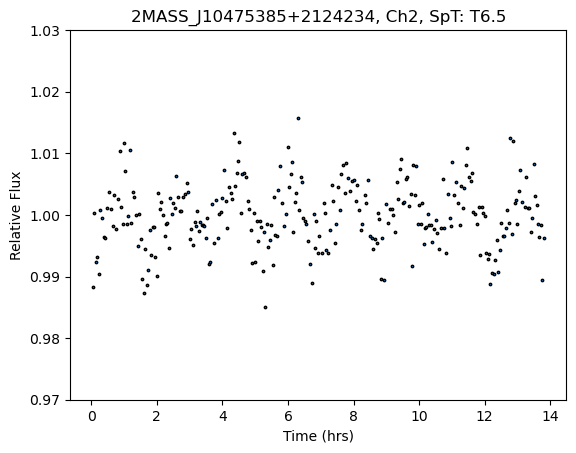

In [11]:
plt.scatter(t1, flux1, s =3, edgecolors = 'black')
plt.ylim(0.97, 1.03)
plt.title('2MASS_J10475385+2124234, Ch2, SpT: T6.5')
plt.xlabel('Time (hrs)')
plt.ylabel('Relative Flux')

In [12]:
Reference = 'Allers et al 2020 Science 368 6487'
Telescope = 'Spitzer Space Telescope'
Object = '2MASS J10475385+2124234'
SpectralType = 'T6.5'
Jmag = '15.819 +/- 0.059'
Hmag = '15.797 +/- 0.12'
Kmag = '16.2 +/- 0.03'
RA = 161.96490000
DEC = 21.40398611
Instrument = 'Spitzer/IRAC'
Date_obs_1 = '2017 April 7'
Date_obs_2 = '2018 April 15'
Band_obs_1 = 'Ch1 [3.6 microns]'
Band_obs_2 = 'Ch2 [4.5 microns]'
TSTART_1 = 57850.7735562
TSTOP_1 = 57851.0611792
TSTART_2 = 58223.1541906
TSTOP_2 = 58223.7298019

In [13]:
dir_save = "C:/Users/kmanj/Manjavacas Research/Allers_2020/1F/"

In [14]:
dir_save = "C:/Users/kmanj/FITS_BD_Files/Data/Allers_2020/"

In [15]:
time = t * u.h
flux = flux * u.dimensionless_unscaled
lc = l.LightCurve(time = time, flux = flux)
lc

time,flux,flux_err
,,
Time,float32,float64
0.002154541046669086,0.9992050528526306,nan
0.003957621132334073,0.9997416734695435,nan
0.005755106608072917,0.9976726770401001,nan
0.007556660721699397,1.0015901327133179,nan
0.0093536376953125,1.0069241523742676,nan
0.01115620881319046,1.00288987159729,nan
0.01331431046128273,1.0020171403884888,nan
0.015116373697916666,1.0022333860397339,nan


In [16]:
time.to(u.h)

<Quantity [0.05170899, 0.09498291, 0.13812256, 0.18135986, 0.2244873 ,
           0.267749  , 0.31954345, 0.36279297, 0.4059326 , 0.44921875,
           0.49581298, 0.54418945, 0.5873413 , 0.63061523, 0.67387694,
           0.71698   , 0.7601929 , 0.80335695, 0.84661865, 0.8897705 ,
           0.9329834 , 0.97613525, 1.0194702 , 1.0625244 , 1.1057739 ,
           1.1489258 , 1.1921387 , 1.2387329 , 1.2871704 , 1.3441528 ,
           1.3908691 , 1.4410889 , 1.487683  , 1.5446045 , 1.5896606 ,
           1.6328125 , 1.6759155 , 1.7191772 , 1.7622802 , 1.8055542 ,
           1.848767  , 1.8919678 , 1.942041  , 1.9921753 , 2.0388305 ,
           2.087256  , 2.1339233 , 2.1771483 , 2.220288  , 2.2634156 ,
           2.3066773 , 2.3498414 , 2.3965576 , 2.444861  , 2.4880981 ,
           2.5312867 , 2.5744996 , 2.6176758 , 2.6695435 , 2.7127075 ,
           2.7575805 , 2.8078125 , 2.8649049 , 2.9114869 , 2.963379  ,
           3.0064087 , 3.0497437 , 3.0928955 , 3.1361694 , 3.1791992 ,
      

In [17]:
lc.to_fits(path = dir_save + '2MASS_J10475385+2124234_Ch2_1_Alle2020.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001957BAE2470>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001957BAE5B40>]

In [18]:
with fits.open(dir_save + '2MASS_J10475385+2124234_Ch2_1_Alle2020.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpectralType
    f[0].header['DATE_OBS'] = Date_obs_1
    f[0].header['TSTART'] = TSTART_1
    f[0].header['TSTOP'] = TSTOP_1
    f[0].header['TIMESYS'] = 'jd'
    f[0].header['TIMEUNIT'] = 'd'
    f[0].header['TELESCOP'] = Telescope
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_2
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = DEC
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag

<Axes: xlabel='Time', ylabel='Flux'>

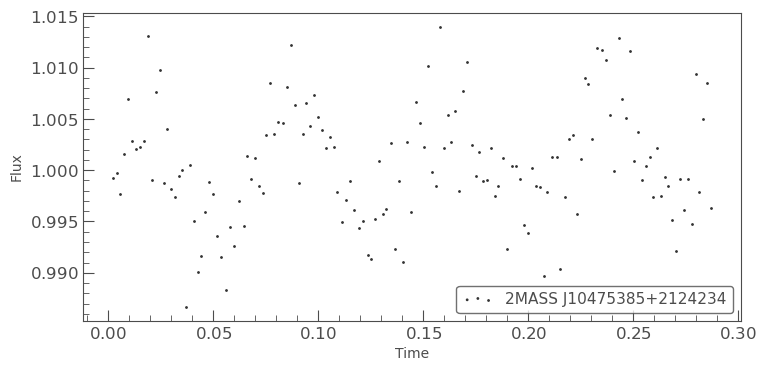

In [19]:
lc = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Allers_2020/2MASS_J10475385+2124234_Ch2_1_Alle2020.fits", time_format = 'mjd')
lc.scatter()

In [20]:
time = t1*u.h
flux = flux1 * u.dimensionless_unscaled

In [21]:
lc = l.LightCurve(time = time, flux = flux)
lc

time,flux,flux_err
,,
Time,float32,float64
0.002151997915158669,0.9882782697677612,nan
0.003953043681879838,1.0003875494003296,nan
0.005751037349303563,0.9923132658004761,nan
0.00755259208381176,0.9931103587150574,nan
0.00971221923828125,0.9903645515441895,nan
0.01180063933134079,1.0008552074432373,nan
0.013671365876992544,0.9994856715202332,nan
0.015904235343138378,0.996442973613739,nan


<Axes: xlabel='Time [JD]', ylabel='Flux'>

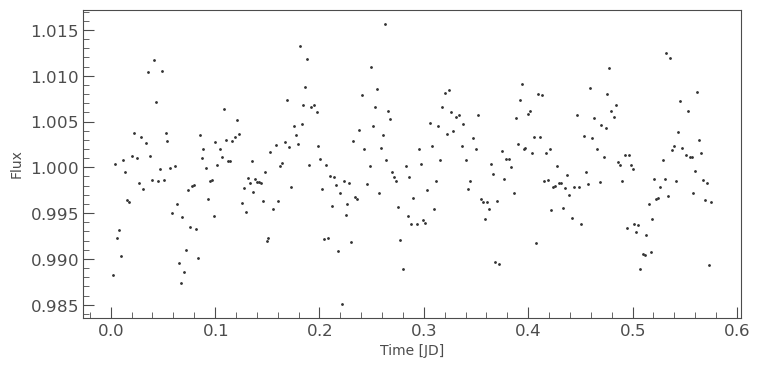

In [22]:
lc.scatter()

In [23]:
lc.to_fits(path = dir_save + '2MASS_J10475385+2124234_Ch2_2_Alle2020.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001957DE744C0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001957DA6CE80>]

In [24]:
with fits.open(dir_save + '2MASS_J10475385+2124234_Ch2_2_Alle2020.fits', mode = 'update') as f:
    f[0].header['OBJECT'] = Object
    f[0].header['SPECTYPE'] = SpectralType
    f[0].header['DATE_OBS'] = Date_obs_2
    f[0].header['TSTART'] = TSTART_2
    f[0].header['TSTOP'] = TSTOP_2
    f[0].header['TIMESYS'] = 'MJD'
    f[0].header['TIMEUNIT'] = 'd'
    f[0].header['TELESCOP'] = Telescope
    f[0].header['INSTRUME'] = Instrument
    f[0].header['FILTER'] = Band_obs_2
    f[0].header['VOREF'] = Reference
    f[0].header['RA_OBJ'] = RA
    f[0].header['DEC_OBJ'] = DEC
    f[0].header['JMAG'] = Jmag
    f[0].header['HMAG'] = Hmag
    f[0].header['KMAG'] = Kmag

Check

<Axes: xlabel='Time [JD]', ylabel='Flux'>

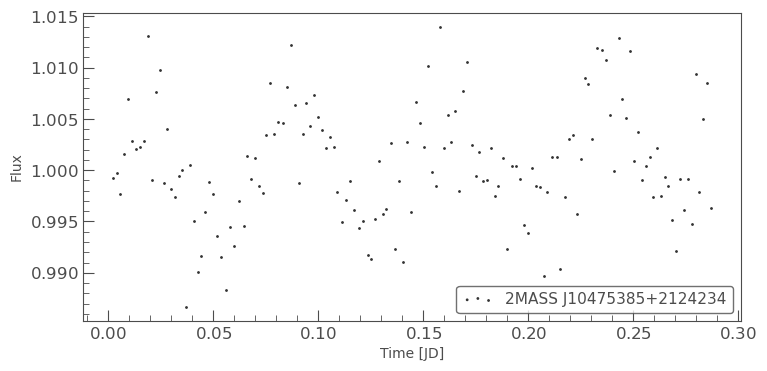

In [25]:
lc = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Allers_2020/2MASS_J10475385+2124234_Ch2_1_Alle2020.fits", time_format = 'jd')
lc.scatter()

<Axes: xlabel='Time [JD]', ylabel='Flux'>

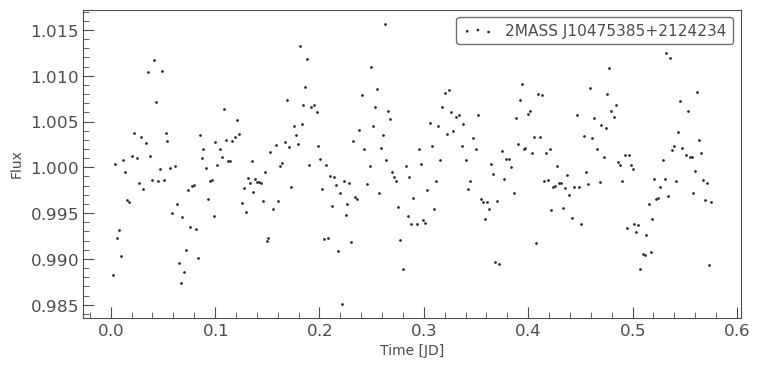

In [26]:
lc = read_generic_lightcurve("C:/Users/kmanj/FITS_BD_Files/Data/Allers_2020/2MASS_J10475385+2124234_Ch2_2_Alle2020.fits", time_format = 'jd')
lc.scatter()